# Practice Python and Image Processing

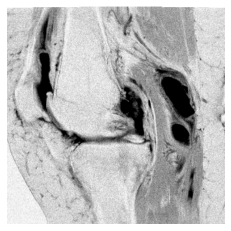

Image shape: (384, 384)
((384, 384), dtype('int32'))
Min pixel value: 0
Max pixel value: 800


In [64]:
# Import necessary libraries
import numpy as np                 # NumPy for numerical operations
from PIL import Image              # PIL (Python Imaging Library) for opening image files
import matplotlib.pyplot as plt    # Matplotlib for displaying images

# Define a function to display images
def display_image(img, cmap='gray_r'):
    # Display the image using matplotlib
    # If the image is 2D (grayscale), use the specified colormap, otherwise use default
    plt.imshow(img, cmap=cmap if img.ndim == 2 else None)
    plt.axis('off')  # Hide the axis ticks and labels
    plt.show()       # Show the plot

# Open the image file 'knee.png' and convert it to a NumPy array
img0 = Image.open('knee.png')  # Open the image file
img0 = np.array(img0)          # Convert the image to a NumPy array

# Display the image using our custom function
display_image(img0)

# Print information about the image
print('Image shape:', img0.shape)  # Print the dimensions of the image
print((img0.shape, img0.dtype))    # Print shape and data type in tuple format
print('Min pixel value:', img0.min())  # Print the minimum pixel value
print('Max pixel value:', img0.max())  # Print the maximum pixel value

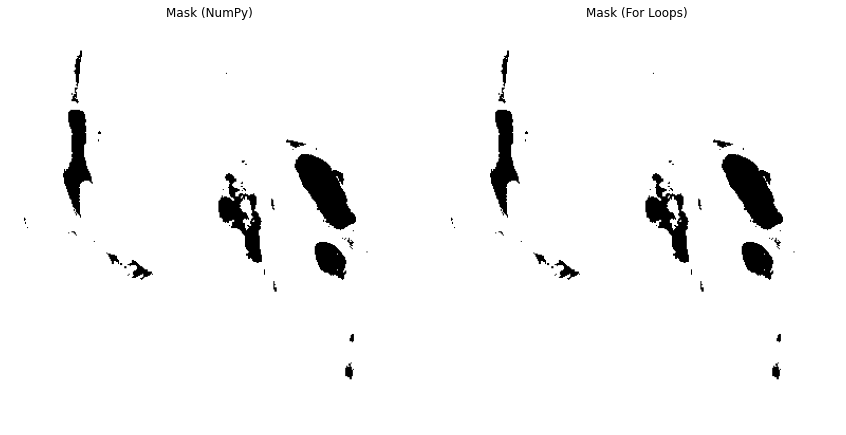

In [29]:
# Import necessary libraries
import numpy as np                 # NumPy for numerical operations
import matplotlib.pyplot as plt    # Matplotlib for plotting
from PIL import Image              # PIL for opening image files

# Load the image
img0 = np.array(Image.open('knee.png'))  # Open image and convert to NumPy array

# Calculate mask using NumPy
mask_numpy = (img0 >= 750)  # Create boolean mask where pixel values >= 750

# Calculate mask using for loops
mask_loop = np.zeros_like(img0, dtype=bool)  # Initialize empty boolean mask
for i in range(img0.shape[0]):  # Iterate over rows
    for j in range(img0.shape[1]):  # Iterate over columns
        if img0[i, j] >= 750:  # Check if pixel value >= 750
            mask_loop[i, j] = True  # Set mask to True if condition is met

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Create figure with 2 subplots

# Display NumPy mask
ax1.imshow(mask_numpy, cmap='gray_r')  # Show NumPy mask
ax1.set_title('Mask (NumPy)')  # Set subplot title
ax1.axis('off')  # Turn off axis

# Display for loop mask
ax2.imshow(mask_loop, cmap='gray_r')  # Show for loop mask
ax2.set_title('Mask (For Loops)')  # Set subplot title
ax2.axis('off')  # Turn off axis

plt.tight_layout()  # Adjust subplot layout
plt.show()  # Display the plot


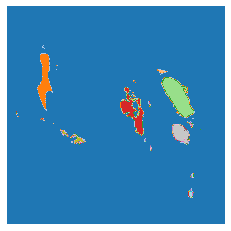

In [30]:
# Import the label function from skimage.measure module
from skimage.measure import label

# Use the previously created NumPy mask
mask = mask_numpy

# Perform connected component labeling on the mask
# The label function does the following:
# 1. Identifies connected regions of True (or non-zero) pixels in the mask
# 2. Assigns a unique integer label to each connected region
# 3. Background (False or zero pixels) is typically labeled as 0
# 4. Each distinct connected region gets a different positive integer label

labeled_image = label(mask)

# Display the labeled image
display_image(labeled_image, cmap='tab20')

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate area per label using nested for loops and dictionary
area_per_label = {}
height, width = labeled_image.shape  # Get dimensions of the image

for label in np.unique(labeled_image):
    if label != 0:  # Ignore background
        area = 0  # Initialize area counter for this label
        ###### YOUR CODE HERE #####
        # Hint: Use nested for loops to iterate over all pixels
        # Hint: Check if each pixel matches the current label
        # Hint: If it matches, increment the area
        height, width = labeled_image.shape
        for i in range(height):
            for j in range(width):
                if labeled_image[i, j] == label:
                    area += 1
        ##### YOUR CODE HERE #####
        area_per_label[label] = area  # Store the calculated area in the dictionary

# The area_per_label dictionary now contains the area of each labeled region
# Keys are the label values, and values are the corresponding areas
# Display area per figure by plot
plt.figure(figsize=(10, 5))
plt.bar(area_per_label.keys(), area_per_label.values())
plt.title("Area per Label")
plt.xlabel("Label")
plt.ylabel("Area")
plt.show()

# Filter out labels larger than a threshold
threshold = 100
filtered_image = np.zeros_like(labeled_image)
for label, area in area_per_label.items():
    if area > threshold:
        filtered_image[labeled_image == label] = label

# Display original and filtered images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.imshow(labeled_image, cmap='tab20')
ax1.set_title("Original Labeled Image")
ax2.imshow(filtered_image, cmap='tab20')
ax2.set_title(f"Filtered Image (Area > {threshold})")
plt.show()

NameError: name 'labeled_image' is not defined

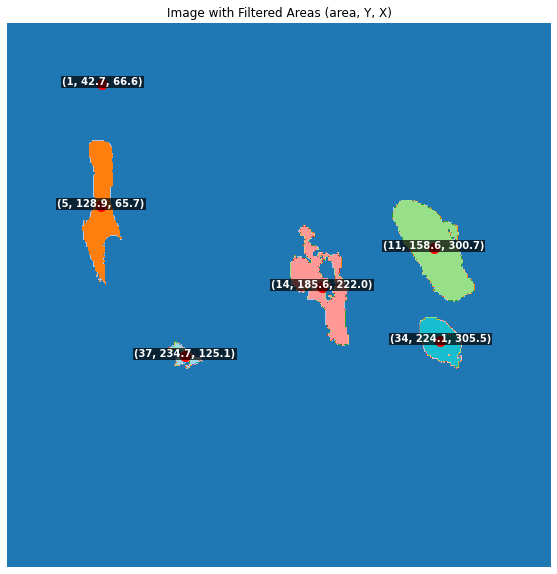

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Assume we have the filtered_image from the previous steps

# Calculate center of gravity for each filtered region using basic for loops
centroids = {}  # Initialize an empty dictionary to store centroids
height, width = filtered_image.shape  # Get the dimensions of the filtered image

for label in np.unique(filtered_image):  # Iterate over unique labels in the image
    if label != 0:  # Ignore background (usually labeled as 0)
        sum_x, sum_y, count = 0, 0, 0  # Initialize sums and count for this label

        for i in range(height):  # Iterate over rows
            for j in range(width):  # Iterate over columns
                ###### YOUR CODE HERE #####
                # Use nested for loops to iterate over all pixels
                # Check if each pixel belongs to the current label
                # If it matches, add the row index to sum_y
                # If it matches, add the column index to sum_x
                # If it matches, increment the count
                if filtered_image[i, j] == label:
                    sum_y += i
                    sum_x += j
                    count += 1
                ##### YOUR CODE HERE #####
        if count > 0:  # If any pixels were found for this label
            centroids[label] = (sum_x / count, sum_y / count)  # Calculate and store centroid

# Display the filtered image with centroids
plt.figure(figsize=(10, 10))  # Create a new figure with size 10x10 inches
plt.imshow(filtered_image, cmap='tab20')  # Display the filtered image with tab20 colormap
plt.title(f"Image with Filtered Areas (area, Y, X)")  # Set the title of the plot

for label, (x, y) in centroids.items():  # Iterate over centroids
    plt.plot(x, y, 'ro', markersize=10)  # Plot a red dot at each centroid
    plt.text(x, y + 2, f"({label}, {y:.1f}, {x:.1f})",  # Add text label
             color='white', fontweight='bold',  # Set text color and weight
             ha='center', va='bottom',  # Set text alignment
             bbox=dict(facecolor='black', alpha=0.7, edgecolor='none', pad=1))  # Add text background

plt.axis('off')  # Turn off axis
plt.show()  # Display the plot